### **Classification Algorithms**

Classification is a supervised machine learning technique used to predict categorical outcomes. For example, predicting whether an email is spam or not spam is a classification problem. 

Two widely used classification algorithms are **Decision Trees** and **Random Forests**.

---

### **1. Decision Trees**

#### **Overview**
- A Decision Tree is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome.
- It partitions the data into subsets based on feature values, leading to decision rules.
- Suitable for both **classification** and **regression** tasks.

#### **How It Works**
1. **Root Node**: Contains the entire dataset and splits based on the best feature.
2. **Splitting**: Divides nodes into subsets based on feature values.
3. **Stopping Criteria**: Splitting stops when:
   - A node is pure (only one class).
   - A predefined depth is reached.
   - A minimum number of samples is in a node.

#### **Key Concepts**
- **Gini Impurity**: Measures the likelihood of an incorrect classification at a node.
  $$
  Gini = 1 - \sum_{i=1}^{n} p_i^2
  $$
- **Entropy**: Measures the amount of disorder or impurity in a node.
  $$
  Entropy = -\sum_{i=1}^{n} p_i \log_2 p_i
  $$
- **Information Gain**: Reduction in entropy after a split.
  $$
  IG = Entropy_{parent} - \sum \left(\frac{\text{samples in child}}{\text{samples in parent}}\right) Entropy_{child}
  $$

---

#### **Python Example: Decision Tree**
```python
# Import libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = load_iris()
X = iris.data # the features or the input variables
y = iris.target # the outcome variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()
```

---

### **2. Random Forests**

#### **Overview**
- A Random Forest is an ensemble method that builds multiple decision trees and merges their results (averaging for regression or majority vote for classification).
- It reduces overfitting and improves generalization.

#### **How It Works**
1. **Bootstrap Sampling**: Randomly selects subsets of data for each tree.
2. **Feature Subsampling**: Considers a random subset of features for splitting at each node.
3. **Ensemble Voting**: Combines predictions from all trees for final output.

#### **Advantages**
- Handles large datasets with high dimensionality.
- Resistant to overfitting compared to individual decision trees.

#### **Key Hyperparameters**
- **n_estimators**: Number of trees in the forest.
- **max_features**: Number of features considered for splitting.
- **max_depth**: Maximum depth of each tree.

---

#### **Python Example: Random Forest**
```python
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
import pandas as pd
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index=iris.feature_names,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)
```

---

### **Key Differences Between Decision Trees and Random Forests**
| **Aspect**             | **Decision Tree**                   | **Random Forest**                     |
|-------------------------|--------------------------------------|---------------------------------------|
| **Model**              | Single tree                         | Ensemble of multiple trees            |
| **Overfitting**        | Prone to overfitting                | Reduces overfitting                   |
| **Accuracy**           | Lower for complex datasets          | Higher due to ensemble effect         |
| **Interpretability**   | Easy to interpret                   | Harder to interpret as an ensemble    |
| **Computation**        | Faster                              | Slower due to multiple trees          |

---

### **Use Cases**
- **Decision Trees**: Simple, interpretable models for small datasets (e.g., credit approval).
- **Random Forests**: Complex problems requiring higher accuracy (e.g., fraud detection, medical diagnosis).

---

### **Activities for Learners**
1. **Implement Decision Trees**: Train a Decision Tree on a classification dataset (e.g., Iris, Titanic) and visualize the tree structure.
2. **Experiment with Random Forests**: Use hyperparameter tuning (e.g., `GridSearchCV`) to optimize a Random Forest model.
3. **Feature Importance Analysis**: Identify which features contribute most to predictions in Random Forests.

---

#### **Example 1: Decision Tree**

In [1]:
#### DECISION TREE CLASSIFICATION 

####  Load the necessary libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_excel('ML_data.xlsx')

#### Summary / Descriptive statistics

df.describe()

df.size

df.shape


(1636, 7)

In [22]:
df.describe()

,y,x1,x2,x3,x4,x5,x6
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,0.640587,2.497642,3.514510,22.536059,25.017434,1493.195939,0.296724
std,0.479975,0.568286,0.583881,1.418700,8.800637,290.325734,0.146817
min,0.000000,1.500820,2.500122,20.003041,10.003843,1000.114914,0.050027
25%,0.000000,2.018942,3.013658,21.327805,17.187164,1238.003263,0.165918
50%,1.000000,2.496941,3.528765,22.567775,25.049356,1496.856086,0.295650
75%,1.000000,2.971964,4.018862,23.736712,32.846297,1750.252919,0.426964
max,1.000000,3.497745,4.499700,24.997292,39.989837,1999.909115,0.549269


In [2]:
df

,y,x1,x2,x3,x4,x5,x6
0,1,2.265811,3.630686,21.520417,33.922309,1581.150447,0.173208
1,1,3.031533,3.358235,22.718771,27.741401,1064.963858,0.056111
2,0,2.604936,4.307487,21.762758,24.565290,1737.274814,0.143025
3,0,2.146088,4.183974,21.962959,37.575452,1217.741769,0.066518
4,0,3.202803,3.610821,23.899532,34.053288,1137.518659,0.367014
...,...,...,...,...,...,...,...
1631,1,2.999177,4.300225,22.039097,29.591840,1588.292145,0.141290
1632,0,2.393838,3.331559,21.234928,12.539319,1551.743726,0.340644
1633,0,2.329839,3.818797,20.703098,32.336969,1934.450408,0.098734
1634,0,2.942272,3.563389,20.740521,11.160115,1304.528365,0.484259


In [2]:
#### Split the dataset into training and testing sets
X = df.drop(columns=['y'])

# Extracting the target variable 'y'
y = df['y']  # Assuming 'y' is the name of your target variable column

# Splitting the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#### Data normalisation
# Performing data normalisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# scaling the training set
X_train = sc.fit_transform(X_train)

#scaling the test set
X_test = sc.transform (X_test)

In [23]:
# Create model using hyperparameters. You can tune these parameters to have a better model
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)

# Fit model
dt_model.fit(X_train, y_train)

# Make predictions 
y_pred = dt_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.600609756097561


### Confusion matrix 

In [24]:
#### Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # note that y_test is the actual or true data
print(cm)

[[ 11 109]
 [ 22 186]]


#### The confusion matrix

The confusion matrix represented in a standard format with labels 0 and 1 for the classes:

\begin{array}{cc|c}
 & \text{Predicted Class 0} & \text{Predicted Class 1} \\
\hline
\text{Actual Class 0} & 11 & 109 \\
\text{Actual Class 1} & 22 & 186 \\
\end{array}

### Summary of the Confusion Matrix:

|                       | **Predicted Class 0** | **Predicted Class 1** | **Total**          |
|-----------------------|-----------------------|-----------------------|---------------------|
| **Actual Class 0**    | **11** (True Negatives) | **109** (False Positives) | 120 (Total Actual Class 0) |
| **Actual Class 1**    | **22** (False Negatives) | **185** (True Positives) | 207 (Total Actual Class 1) |
| **Total**             | 33                   | 294                   | 327 (Overall Total) |

---

### Metrics Calculations:
1. **Accuracy**:  
   $$
   \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{11 + 185}{327} \approx 0.599 \, (59.9\%)
   $$

2. **Precision** (for Class 1):  
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} = \frac{185}{185 + 109} \approx 0.629 \, (62.9\%)
   $$

3. **Recall** (Sensitivity, for Class 1):  
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} = \frac{185}{185 + 22} \approx 0.894 \, (89.4\%)
   $$

4. **F1-Score** (for Class 1):  
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.629 \times 0.894}{0.629 + 0.894} \approx 0.738 \, (73.8\%)
   $$

5. **Specificity** (for Class 0):  
   $$
   \text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives + False Positives}} = \frac{11}{11 + 109} \approx 0.092 \, (9.2\%)
   $$

---

### Insights:
- **High Recall (89.4%)**: The model is good at identifying Class 1 (Actual Positives).  
- **Low Specificity (9.2%)**: The model struggles to identify Class 0 (Actual Negatives).  
- **Moderate Precision (62.9%)**: A significant portion of predicted positives are incorrect.  
- **Accuracy (59.9%)**: The overall performance is moderate, but it might be misleading due to class imbalance.  
- **Class Imbalance**: Class 1 dominates (207 instances vs. 120 for Class 0), which may bias the model.


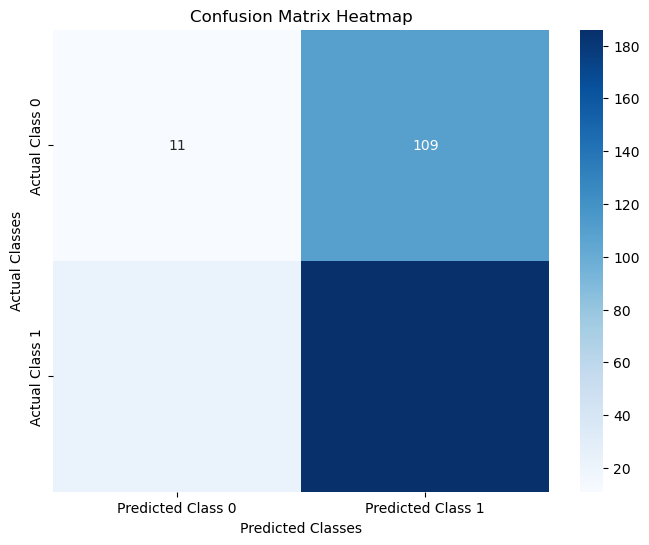

In [12]:
# Example confusion matrix data
confusion_matrix_data = {
    'Predicted Class 0': [11, 22],
    'Predicted Class 1': [109, 186]
}

# Convert the confusion matrix data to a DataFrame
df_confusion_matrix = pd.DataFrame(confusion_matrix_data, index=['Actual Class 0', 'Actual Class 1'])

# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


### Classification report

In [9]:
# classification report
class_rept = classification_report(y_test, y_pred)
#print(f"class_rept: {Classification report}")
print(class_rept)


              precision    recall  f1-score   support

           0       0.33      0.09      0.14       120
           1       0.63      0.89      0.74       208

    accuracy                           0.60       328
   macro avg       0.48      0.49      0.44       328
weighted avg       0.52      0.60      0.52       328



### Detailed Interpretation of Classification Report:

| Metric           | Class 0 (Negative) | Class 1 (Positive) | Overall |
|-------------------|--------------------|--------------------|---------|
| **Precision**     | **0.33**           | **0.63**           | Weighted Avg: **0.52** |
| **Recall**        | **0.09**           | **0.89**           | Weighted Avg: **0.60** |
| **F1-Score**      | **0.14**           | **0.74**           | Weighted Avg: **0.52** |
| **Support**       | **120**            | **208**            | Total: **328**         |

---

### Key Observations:

#### 1. **Class 0 (Negative Class)**:
- **Precision (33%)**: Only 33% of the predicted negatives are actually correct. This suggests a high rate of false positives.
- **Recall (9%)**: The model identifies only 9% of the actual negative cases correctly, indicating poor sensitivity for Class 0.
- **F1-Score (14%)**: The harmonic mean of precision and recall is very low, reflecting the poor performance for Class 0.
- **Support (120)**: There are fewer instances of Class 0, which may contribute to the poor performance due to class imbalance.

#### 2. **Class 1 (Positive Class)**:
- **Precision (63%)**: A significant portion of the predicted positives are correct.
- **Recall (89%)**: The model successfully identifies 89% of the actual positive cases, indicating strong sensitivity for Class 1.
- **F1-Score (74%)**: The balance between precision and recall is much better for Class 1.
- **Support (208)**: More instances of Class 1 contribute to better model performance for this class.

#### 3. **Overall Metrics**:
- **Accuracy (60%)**: The overall performance is moderate, with 60% of predictions correct. However, accuracy alone can be misleading due to class imbalance.
- **Macro Avg (48% Precision, 49% Recall, 44% F1-Score)**: These metrics treat both classes equally and highlight the poor performance for Class 0.
- **Weighted Avg (52% Precision, 60% Recall, 52% F1-Score)**: These metrics account for the class distribution and emphasize the higher support for Class 1.

---

### Insights:
- **Class Imbalance**: The model performs significantly better for Class 1, likely due to the imbalance in class distribution (208 vs. 120).
- **Poor Recall for Class 0**: The low recall for Class 0 (9%) means the model misses most negative cases, which could be critical in applications like fraud detection or medical diagnosis.
- **Precision vs. Recall Tradeoff**: While precision for Class 1 is moderate (63%), the high recall (89%) shows the model prioritizes capturing positives over avoiding false positives.



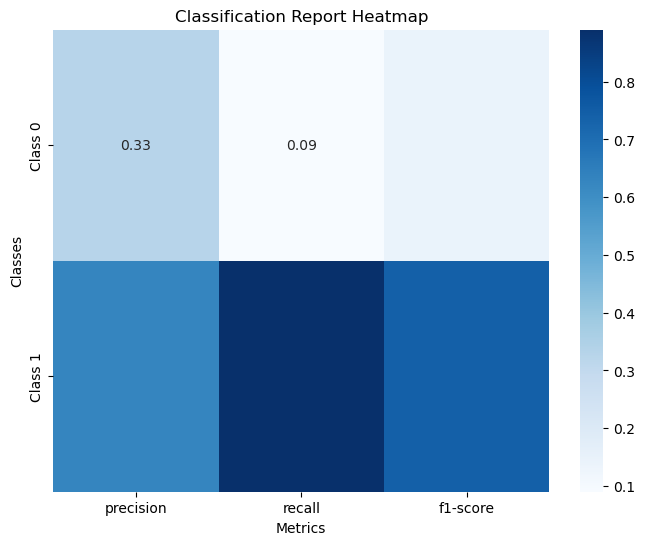

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Example classification report data
report_data = {
    'precision': [0.33, 0.63],
    'recall': [0.09, 0.89],
    'f1-score': [0.14, 0.74]
}

# Define the classes
classes = ['Class 0', 'Class 1']

# Convert the report data to a DataFrame
df_report = pd.DataFrame(report_data, index=classes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

### ROC curve

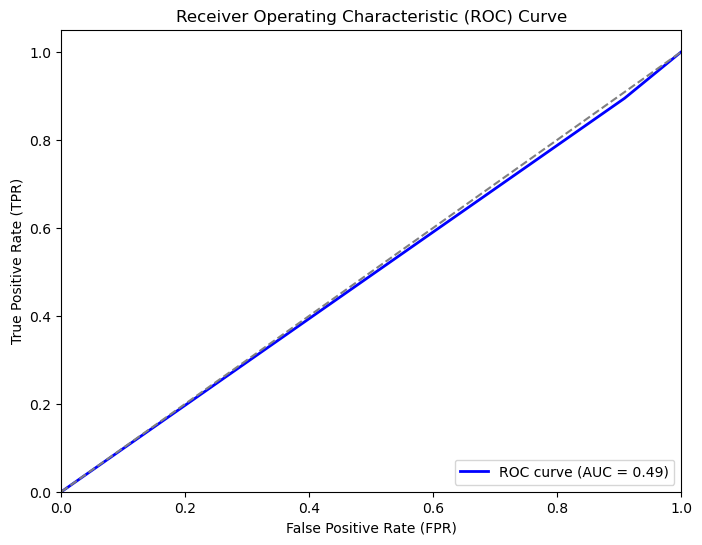

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and predictions are already defined
# y_test contains the true labels and predictions contains the predicted labels

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Analysis:
1. **Interpretation of the Curve**:
   - The ROC curve is close to the diagonal line, which represents random guessing.
   - The True Positive Rate (TPR) increases proportionally to the False Positive Rate (FPR), which suggests the model struggles to distinguish between the positive and negative classes.

2. **AUC Value**:
   - An AUC of **0.49** is below 0.5, which indicates **no discriminatory power** for the classifier.
   - A perfect model would have an AUC of **1.0**, and a completely random model has an AUC of **0.5**.

3. **Implications**:
   - The current model does not perform better than random chance.
   - Potential reasons could include:
     - Poor feature selection.
     - Data imbalance between classes.
     - A weak model or inappropriate hyperparameter settings.

---

### Recommendations for Improvement:
1. **Check Data Preprocessing**:
   - Ensure features are scaled if necessary (e.g., for algorithms sensitive to feature magnitudes).
   - Address any class imbalance using techniques like SMOTE, oversampling, or undersampling.

2. **Feature Engineering**:
   - Explore additional relevant features or transformations of existing features.
   - Use feature selection methods to identify important predictors.

3. **Model Selection**:
   - Experiment with other classification algorithms such as **Random Forest, Gradient Boosting, or SVM**.
   - Compare their performance using cross-validation.

4. **Hyperparameter Optimization**:
   - Fine-tune the model parameters using grid search or random search to improve performance.

5. **Data Insights**:
   - Analyze the dataset for noise, irrelevant features, or missing values that might affect performance.

### Using iris dataset

In [18]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

## Flatten the X_test and y_pred to have same dimension as y_test
data = {'Actual y': y_test, 'Predicted y': y_pred}
df = pd.DataFrame(data)
print("\nActual Values and Predictions:")
print(df.head().to_string(index=False))
### Write the output to a excel file
#df.to_excel("actual_predicted.xlsx", index=False)


Actual Values and Predictions:
 Actual y  Predicted y
        1            1
        0            0
        2            2
        1            1
        1            1


### Evaluate the model

In [56]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Visualize the Decision Tree

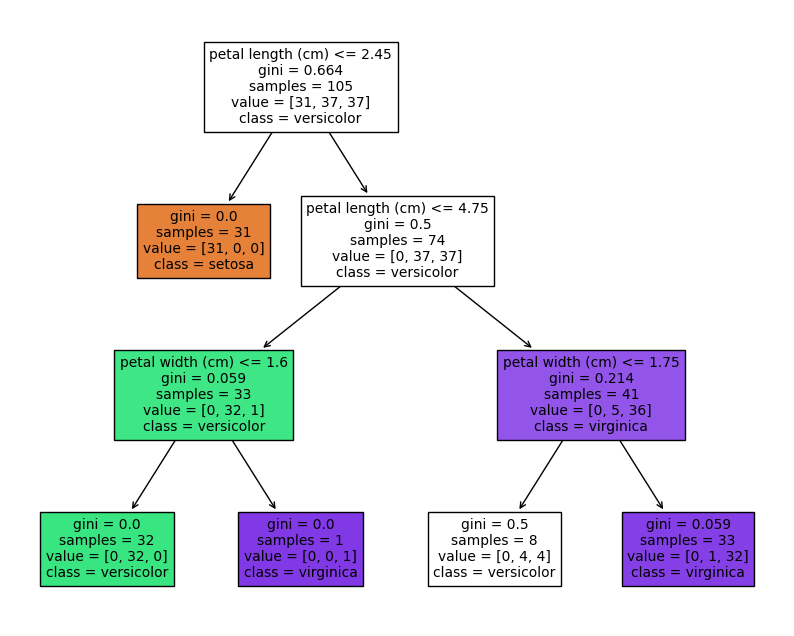

In [59]:
# Visualize the Decision Tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

### Key Observations:
1. **Root Node**:
   - Splits on the feature **`petal length (cm) <= 2.45`**.
   - The split achieves a Gini index of **0.664**, and this node contains all 105 samples evenly distributed among three classes: `setosa`, `versicolor`, and `virginica`.
   - The dominant class is `versicolor`.

2. **Intermediate Nodes**:
   - The left child of the root perfectly classifies **`setosa`**, with a Gini index of **0.0** and 31 samples.
   - The right child further splits on **`petal length (cm) <= 4.75`**, refining classifications between `versicolor` and `virginica`.

3. **Leaf Nodes**:
   - Classifications at leaf nodes have very low Gini indices, indicating a strong separation of the classes.
   - For example:
     - **Node 1**: `class=setosa`, Gini = 0.0, samples = 31.
     - **Node 2**: `class=virginica`, Gini ≈ 0.059, samples = 33.

4. **Features Importance**:
   - `petal length (cm)` and `petal width (cm)` are the most influential features in this tree.
   - `sepal length (cm)` and `sepal width (cm)` appear to have negligible influence, as they are not used in the splits.

### Insights:
- **Balanced Classification**: The decision tree works well for this dataset, achieving pure splits at the leaf nodes.
- **Intuitive Splits**: Features like petal dimensions are biologically relevant for distinguishing among the classes in the Iris dataset.


#### **Example 2: Random Forest**

In [25]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris

# Load dataset (it is a built-in data)
iris = load_iris()
X = iris.data # features/independent variable/predictors/input 
y = iris.target # target/dependent/outcome

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) # hyperparameters
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

In [27]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
import pandas as pd
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index=iris.feature_names,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

                   Importance
petal width (cm)     0.436574
petal length (cm)    0.417326
sepal length (cm)    0.104614
sepal width (cm)     0.041486


### Detailed Analysis of Random Forest Results

#### Performance Metrics:

| Metric            | Class 0 | Class 1 | Class 2 | Overall |
|--------------------|---------|---------|---------|---------|
| **Precision**      | 1.00    | 1.00    | 1.00    | Weighted Avg: 1.00 |
| **Recall**         | 1.00    | 1.00    | 1.00    | Weighted Avg: 1.00 |
| **F1-Score**       | 1.00    | 1.00    | 1.00    | Weighted Avg: 1.00 |
| **Support**        | 19      | 13      | 13      | Total: 45          |

---

#### Key Observations:
1. **Perfect Accuracy (1.00)**:
   - The model predicts all the classes with 100% accuracy. All instances of Class 0, Class 1, and Class 2 are classified correctly.
   - The F1-score of 1.00 for each class reflects a perfect balance between precision and recall.

2. **Balanced Class Distribution**:
   - Each class has a small and relatively balanced number of instances (19, 13, and 13). This makes the dataset less prone to class imbalance issues.

3. **Macro and Weighted Averages**:
   - Since all classes have perfect metrics, the macro and weighted averages also reflect 1.00.

---

#### Feature Importances:

| Feature              | Importance |
|-----------------------|------------|
| **Petal Width (cm)**  | **43.66%** |
| **Petal Length (cm)** | **41.73%** |
| **Sepal Length (cm)** | **10.46%** |
| **Sepal Width (cm)**  | **4.15%**  |

- **Petal Width and Length**:
   - These features are the most significant in determining the classes, contributing approximately 85% of the predictive power.
   - This aligns with domain knowledge of the Iris dataset, where petal dimensions are key differentiators among species.
   
- **Sepal Features**:
   - While important, sepal length and width contribute less significantly compared to petal features, with a combined importance of about 15%.

---

#### Interpretation:
1. **Why Accuracy is 1.00?**
   - Random Forests are highly capable of learning from data, especially small and clean datasets like the Iris dataset.
   - Overfitting might occur if the model memorizes the training data due to a small dataset or low noise levels.

2. **Use of Feature Importances**:
   - Petal width and length should be prioritized in any dimensionality reduction or feature selection process for similar tasks.
   - Sepal features can potentially be removed if computational efficiency is required without significant loss of model performance.

---

#### Recommendations:
1. **Test on Larger Datasets**:
   - While the model performs perfectly here, ensure that it generalizes well by testing on a larger or more complex dataset.
   
2. **Cross-Validation**:
   - Use k-fold cross-validation to confirm that the perfect performance isn't due to overfitting.

3. **Hyperparameter Tuning**:
   - Ensure the Random Forest is not overfitted by adjusting parameters like the maximum depth, number of estimators, and minimum samples per leaf.

4. **Visualization**:
   - Plot feature importances to visually understand which features drive the model.
   - Use decision boundary visualizations to see how well the model separates the classes. 

---



### Feature Importance Plot

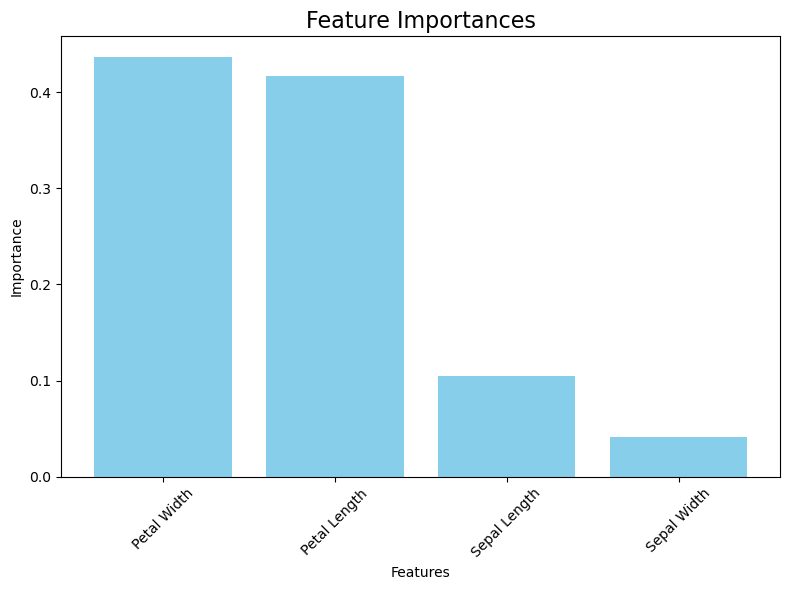

In [17]:
### Example Python Code for Feature Importance Plot:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
features = ['Petal Width', 'Petal Length', 'Sepal Length', 'Sepal Width']
importances = [0.436574, 0.417326, 0.104614, 0.041486]
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.title("Feature Importances", fontsize=16)
plt.bar(range(len(features)), np.array(importances)[indices], align="center", color='skyblue')
plt.xticks(range(len(features)), np.array(features)[indices], rotation=45)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
